     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 103.1 MB/s eta 0:00:00
Step 0: Cost = 1.6012
Step 20: Cost = 1.6012
Step 40: Cost = 1.6012
Step 60: Cost = 1.6012
Step 80: Cost = 1.6012


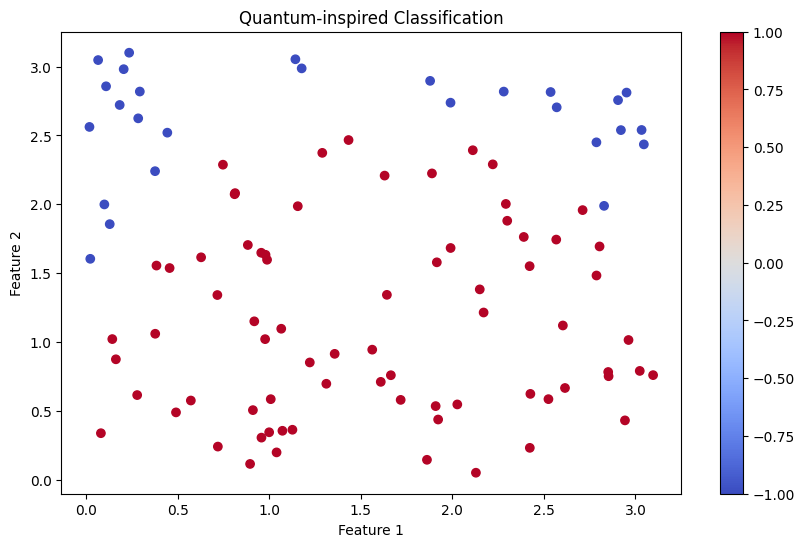

In [1]:
# Install quantum computing library
!pip install pennylane

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Create a quantum device
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def quantum_circuit(params):
    # Quantum circuit for classification
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RZ(params[2], wires=0)
    return qml.expval(qml.PauliZ(0))

# Generate sample data
np.random.seed(42)
X = np.random.random((100, 2)) * np.pi
y = np.array([1 if np.sin(x[0]) + np.cos(x[1]) > 0 else -1 for x in X])

# Quantum-inspired classical optimization
def cost_function(params):
    predictions = [quantum_circuit(np.concatenate([x, params])) for x in X]
    loss = np.mean((np.array(predictions) - y) ** 2)
    return loss

# Optimize parameters
opt = qml.GradientDescentOptimizer(stepsize=0.1)
params = np.random.random(3)

for i in range(100):
    params = opt.step(cost_function, params)
    if i % 20 == 0:
        print(f"Step {i}: Cost = {cost_function(params):.4f}")

# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.colorbar()
plt.title('Quantum-inspired Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()